# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
citylist = []
lat = []
long = []
maxtemp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []
count = 0

# Begin Print Log
print(f"Beginning Data Retrieval")   
print(f"-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        citylist.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count = count + 1
        print(f"Processing Record {count} | {city}")
    except:
        print(f"City not found. Skipping...")
        pass
    
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | vaini
Processing Record 2 | luderitz
Processing Record 3 | rikitea
Processing Record 4 | ushuaia
Processing Record 5 | chapais
Processing Record 6 | datong
Processing Record 7 | kapaa
Processing Record 8 | pochutla
Processing Record 9 | mandalgovi
Processing Record 10 | atuona
Processing Record 11 | pevek
City not found. Skipping...
Processing Record 12 | north platte
Processing Record 13 | dingle
Processing Record 14 | upernavik
Processing Record 15 | faya
Processing Record 16 | cherskiy
Processing Record 17 | albany
Processing Record 18 | carnarvon
Processing Record 19 | kruisfontein
Processing Record 20 | new norfolk
Processing Record 21 | parrita
Processing Record 22 | pathein
Processing Record 23 | ribeira grande
Processing Record 24 | azogues
Processing Record 25 | bluff
Processing Record 26 | salalah
Processing Record 27 | paratebueno
Processing Record 28 | qaanaaq
Processing Record 29 | rawatsar
Proces

Processing Record 227 | romitan
Processing Record 228 | flin flon
Processing Record 229 | oussouye
Processing Record 230 | martapura
Processing Record 231 | prince rupert
Processing Record 232 | kirakira
Processing Record 233 | pinhao
Processing Record 234 | yar-sale
Processing Record 235 | sao filipe
Processing Record 236 | chirongui
Processing Record 237 | masallatah
Processing Record 238 | dong hoi
Processing Record 239 | stornoway
Processing Record 240 | barranca
Processing Record 241 | hay river
Processing Record 242 | yarim
Processing Record 243 | vilsbiburg
Processing Record 244 | bonthe
Processing Record 245 | brainerd
Processing Record 246 | bethel
Processing Record 247 | derzhavinsk
Processing Record 248 | ambon
Processing Record 249 | faanui
Processing Record 250 | saint anthony
Processing Record 251 | nova odesa
City not found. Skipping...
Processing Record 252 | ballina
Processing Record 253 | san jose de guanipa
Processing Record 254 | honningsvag
Processing Record 255 | 

Processing Record 464 | alugan
Processing Record 465 | cascais
Processing Record 466 | dudinka
Processing Record 467 | nova vicosa
City not found. Skipping...
City not found. Skipping...
Processing Record 468 | kapuskasing
Processing Record 469 | nishihara
Processing Record 470 | benemerito de las americas
Processing Record 471 | payo
Processing Record 472 | rajauri
City not found. Skipping...
City not found. Skipping...
Processing Record 473 | goma
Processing Record 474 | dandong
Processing Record 475 | jaunjelgava
Processing Record 476 | abonnema
Processing Record 477 | dondo
City not found. Skipping...
Processing Record 478 | puerto carreno
Processing Record 479 | mirnyy
Processing Record 480 | kangaatsiaq
Processing Record 481 | ahuimanu
Processing Record 482 | kawalu
Processing Record 483 | yakima
City not found. Skipping...
Processing Record 484 | saint-francois
Processing Record 485 | pioner
Processing Record 486 | corinto
Processing Record 487 | yenagoa
Processing Record 488 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# Create a data frame
weather_dict = {
    "City": citylist,
    "Lat": lat,
    "Lng": long,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

# Export data frame as a CSV file
weather_data.to_csv(output_data_file, index=False, header=True)

In [24]:
# Display statistics on data frame
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,20.355606,13.469967,13.175714,73.739927,57.313187,3.378993,1.616725e+09
std,33.075114,90.259029,13.697513,20.928409,39.626037,2.277594,9.086446e+01
min,-54.800000,-179.166700,-33.080000,8.000000,0.000000,0.070000,1.616725e+09
25%,-6.196250,-67.386725,5.727500,65.000000,15.250000,1.572500,1.616725e+09
50%,27.028950,12.531150,17.180000,78.000000,75.000000,2.955000,1.616725e+09
75%,47.344025,89.831750,24.000000,89.000000,98.000000,4.690000,1.616725e+09
max,78.218600,179.316700,32.220000,100.000000,100.000000,18.520000,1.616725e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
too_humid = weather_data.loc[weather_data["Humidity"] > 100]

In [26]:
#  Get the indices of cities that have humidity over 100%.
too_humid_list = list(too_humid.index)

In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(too_humid_list, inplace = False)

In [71]:
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,29.00,79,75,5.14,TO,1616724983
1,Lüderitz,-26.6481,15.1594,16.09,97,32,2.89,NA,1616724983
2,Rikitea,-23.1203,-134.9692,26.66,72,100,8.52,PF,1616724984
3,Ushuaia,-54.8000,-68.3000,6.00,75,40,9.26,AR,1616724930
4,Chapais,49.7834,-74.8492,-2.00,93,90,4.12,CA,1616724984


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [72]:
# Index for saving plots. All plot code needs to be executed in order in order to update index.
plot_count = 0

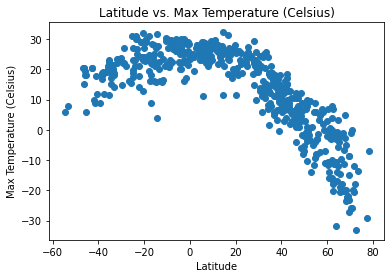

In [73]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.title('Latitude vs. Max Temperature (Celsius)')
# Update index and save plot with index in name
plot_count = plot_count + 1
plt.savefig(f"output_data/plot{plot_count}.png")
plt.show()

## Latitude vs. Humidity Plot

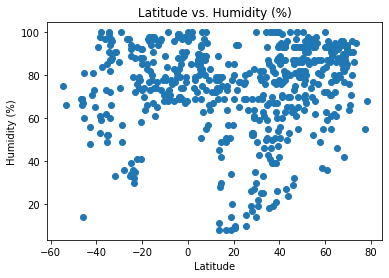

In [74]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (%)')
plot_count = plot_count + 1
plt.savefig(f"output_data/plot{plot_count}.png")
plt.show()

## Latitude vs. Cloudiness Plot

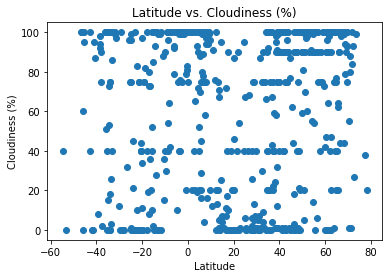

In [75]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness (%)')
plot_count = plot_count + 1
plt.savefig(f"output_data/plot{plot_count}.png")
plt.show()

## Latitude vs. Wind Speed Plot

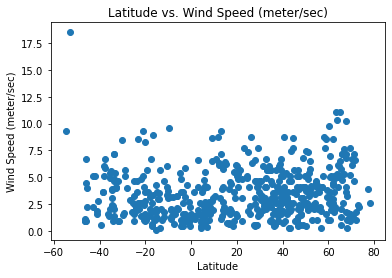

In [76]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meter/sec)')
plt.title('Latitude vs. Wind Speed (meter/sec)')
plot_count = plot_count + 1
plt.savefig(f"output_data/plot{plot_count}.png")
plt.show()

## Linear Regression

In [77]:
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7938697515277817


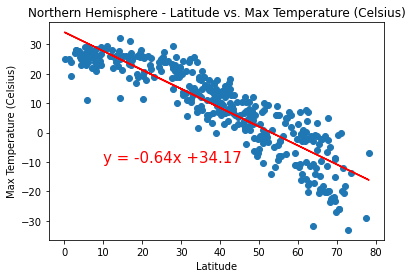

In [78]:
# Set data to x and y axes
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create scatter plot with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.title('Northern Hemisphere - Latitude vs. Max Temperature (Celsius)')
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
plot_count = plot_count + 1
plt.savefig(f"output_data/plot{plot_count}.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2903625818280657


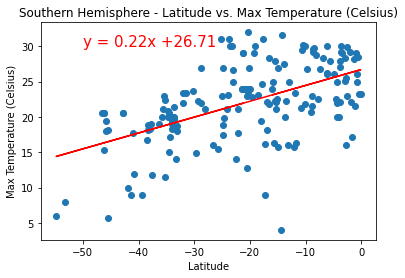

In [79]:
# Set data to x and y axes
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create scatter plot with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.title('Southern Hemisphere - Latitude vs. Max Temperature (Celsius)')
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plot_count = plot_count + 1
plt.savefig(f"output_data/plot{plot_count}.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04786195162525703


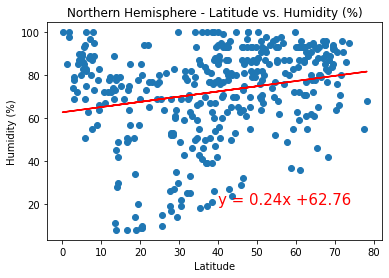

In [80]:
# Set data to x and y axes
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create scatter plot with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Latitude vs. Humidity (%)')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plot_count = plot_count + 1
plt.savefig(f"output_data/plot{plot_count}.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06558290558696893


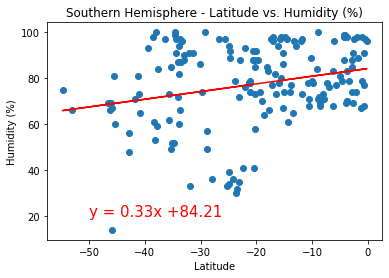

In [81]:
# Set data to x and y axes
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create scatter plot with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Latitude vs. Humidity (%)')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plot_count = plot_count + 1
plt.savefig(f"output_data/plot{plot_count}.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07123618006705895


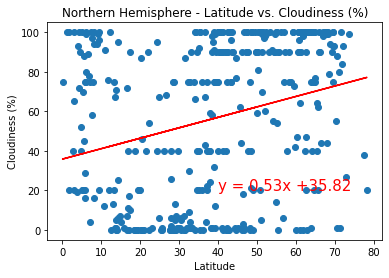

In [82]:
# Set data to x and y axes
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create scatter plot with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Latitude vs. Cloudiness (%)')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plot_count = plot_count + 1
plt.savefig(f"output_data/plot{plot_count}.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03516151792383552


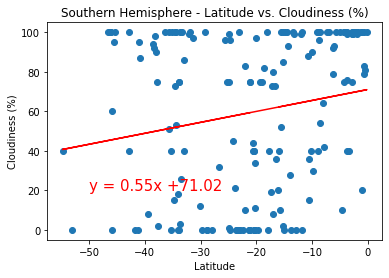

In [83]:
# Set data to x and y axes
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create scatter plot with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Latitude vs. Cloudiness (%)')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plot_count = plot_count + 1
plt.savefig(f"output_data/plot{plot_count}.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.024285473276330596


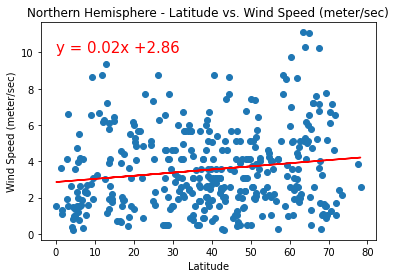

In [84]:
# Set data to x and y axes
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create scatter plot with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meter/sec)')
plt.title('Northern Hemisphere - Latitude vs. Wind Speed (meter/sec)')
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plot_count = plot_count + 1
plt.savefig(f"output_data/plot{plot_count}.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10414059478533072


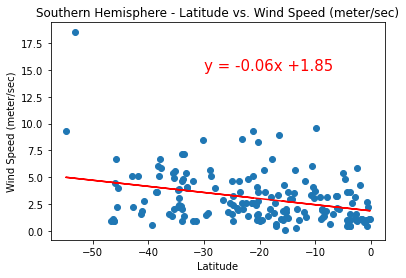

In [85]:
# Set data to x and y axes
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print r value
print(f"The r-value is: {rvalue**2}")

# Create scatter plot with linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meter/sec)')
plt.title('Southern Hemisphere - Latitude vs. Wind Speed (meter/sec)')
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plot_count = plot_count + 1
plt.savefig(f"output_data/plot{plot_count}.png")
plt.show()

In [ ]:
# Observations

# 1) The Northern Hemisphere has a strong corelation between Latitude vs. Max Temperature while the Southern Hemisphere is not
#    as strong. This is likely due to the seasons influenced by the tilted axis of the Earth.
# 2) The Northern Hemisphere appears to be experiencing the season of winter while the southern hemisphere is the opposite,
#    experiencing the season of summer. This is largely based on the range of Max Temperature between hemispheres.
# 3) The Wind Speed appears to plateau out at about 10 meters/sec in both the Northern and Southern Hemisphere. Any anomalous
#    data above that plateau could very well be a storm event and is otherwise isolated.